# 🔄 Data Loading 

In [1]:
import pandas as pd 

fear_greed=pd.read_csv("fear_greed_index.csv") #loading csv in pandas
print(fear_greed.head(1))

historical_data=pd.read_csv("historical_data.csv")
print(historical_data.head(1))


    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50             0.0       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp  
0     True  0.345404  8.950000e+14  1.730000e+12  


# 📖 Data Overview

In [2]:
print("fear-greed-data :")
print(fear_greed.shape)  # to get no. of rows n coloum

print(fear_greed.info())  # to get basic info of csv

print(fear_greed.isnull().sum())  # list of coloums nd the number of empty cells 



print("historical data :")

print(historical_data.shape) 

print(historical_data.info())

print(historical_data.isnull().sum())


fear-greed-data :
(2644, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None
timestamp         0
value             0
classification    0
date              0
dtype: int64
historical data :
(211224, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          

# 🧹 Data Preparation

In [4]:
 # extracting important coloums 
fear_greed=fear_greed[["date","classification"]] 
print(fear_greed.head())

historical_data = historical_data[["Timestamp IST", "Closed PnL", "Side", "Execution Price", "Fee"]]
print(historical_data.head())



         date classification
0  2018-02-01           Fear
1  2018-02-02   Extreme Fear
2  2018-02-03           Fear
3  2018-02-04   Extreme Fear
4  2018-02-05   Extreme Fear
      Timestamp IST  Closed PnL Side  Execution Price       Fee
0  02-12-2024 22:50         0.0  BUY           7.9769  0.345404
1  02-12-2024 22:50         0.0  BUY           7.9800  0.005600
2  02-12-2024 22:50         0.0  BUY           7.9855  0.050431
3  02-12-2024 22:50         0.0  BUY           7.9874  0.050043
4  02-12-2024 22:50         0.0  BUY           7.9894  0.003055


In [5]:
fear_greed["date"] = pd.to_datetime(fear_greed["date"]).dt.date # converting "date" coloum into correct date fromat

historical_data["Timestamp IST"] = pd.to_datetime(historical_data["Timestamp IST"], errors="coerce")  # converting "Timestamp IST" coloum into correct date fromat
historical_data["date"] = historical_data["Timestamp IST"].dt.date  # renaming "Timestamp IST' to "date" for merging data on "date"
merged_df = pd.merge(historical_data, fear_greed, on="date", how="left") #merging data on "date"
print(merged_df.head())

print(merged_df["classification"].value_counts()) # total trades in each sentiments


        Timestamp IST  Closed PnL Side  Execution Price       Fee        date  \
0 2024-02-12 22:50:00         0.0  BUY           7.9769  0.345404  2024-02-12   
1 2024-02-12 22:50:00         0.0  BUY           7.9800  0.005600  2024-02-12   
2 2024-02-12 22:50:00         0.0  BUY           7.9855  0.050431  2024-02-12   
3 2024-02-12 22:50:00         0.0  BUY           7.9874  0.050043  2024-02-12   
4 2024-02-12 22:50:00         0.0  BUY           7.9894  0.003055  2024-02-12   

  classification  
0          Greed  
1          Greed  
2          Greed  
3          Greed  
4          Greed  
classification
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64


# 📊 Exploratory Data Analysis (EDA)

In [22]:
# in which sentiment people make more proftis
average_pnl_by_sentiments=merged_df.groupby("classification")["Closed PnL"].mean().sort_values(ascending=False)
print(average_pnl_by_sentiments) 



# buy and sell counts in each sentiments 
buy_sell_count= merged_df.groupby(["classification" , "Side"]).size().unstack()
print(buy_sell_count)  


# It calculates the average Execution Price(where trade closes) and Fee for each sentiment group 
price_fee_average=merged_df.groupby("classification")[["Execution Price","Fee"]].mean()
print(price_fee_average)

classification
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Extreme Fear       1.891632
Name: Closed PnL, dtype: float64
Side             BUY  SELL
classification            
Extreme Fear    1168  1158
Extreme Greed   1661  3960
Fear            7307  6562
Greed           5407  5885
Neutral         1020  1736
                Execution Price       Fee
classification                           
Extreme Fear        5604.219568  0.686479
Extreme Greed       4545.600449  0.835794
Fear                6846.547731  1.131521
Greed              11004.638053  1.092947
Neutral             5309.524631  0.922389


In [10]:
# summary statistics (count, mean, std, min, quartiles, max) of Closed PnL for each sentiment classification group.
pnl_distribution = merged_df.groupby("classification")["Closed PnL"].describe()
print(pnl_distribution)  



# in which sentiment people make more profit
sentiment_win_rate=merged_df.groupby("classification")["Closed PnL"].apply(lambda x: (x > 0).mean())
print(sentiment_win_rate) 


                  count        mean          std            min  25%      50%  \
classification                                                                  
Extreme Fear     2326.0    1.891632    76.727713   -1430.889856  0.0  0.00000   
Extreme Greed    5621.0  205.816345  1861.557119  -18360.670070  0.0  0.96048   
Fear            13869.0  128.287950  1342.348497  -19841.240140  0.0  0.00000   
Greed           11292.0   53.988003  1399.468182 -117990.104100  0.0  0.00000   
Neutral          2756.0   27.088803   142.945889   -1032.981540  0.0  0.00000   

                      75%           max  
classification                           
Extreme Fear     0.298102   2020.000000  
Extreme Greed   30.153710  44223.451870  
Fear             8.201820  71535.716740  
Greed           13.441364  34903.817100  
Neutral          9.267691   2979.554311  
classification
Extreme Fear     0.292777
Extreme Greed    0.553282
Fear             0.381787
Greed            0.435707
Neutral          0.

In [11]:
# maximum trade acc to sentiments/classification
maximun_trade_in_which_sentiment=merged_df["classification"].value_counts()
print(maximun_trade_in_which_sentiment) 



#calculating how much fee is needed for buying nd selling which side require more fee 
max_fee_neded_for_trade=merged_df.groupby("Side")["Fee"].mean().sort_values(ascending=False)
print(max_fee_neded_for_trade)    


classification
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64
Side
BUY     1.178545
SELL    1.150172
Name: Fee, dtype: float64


#

# 📈 Visualization :

### Average Profit and Loss by Sentiments using bar chart

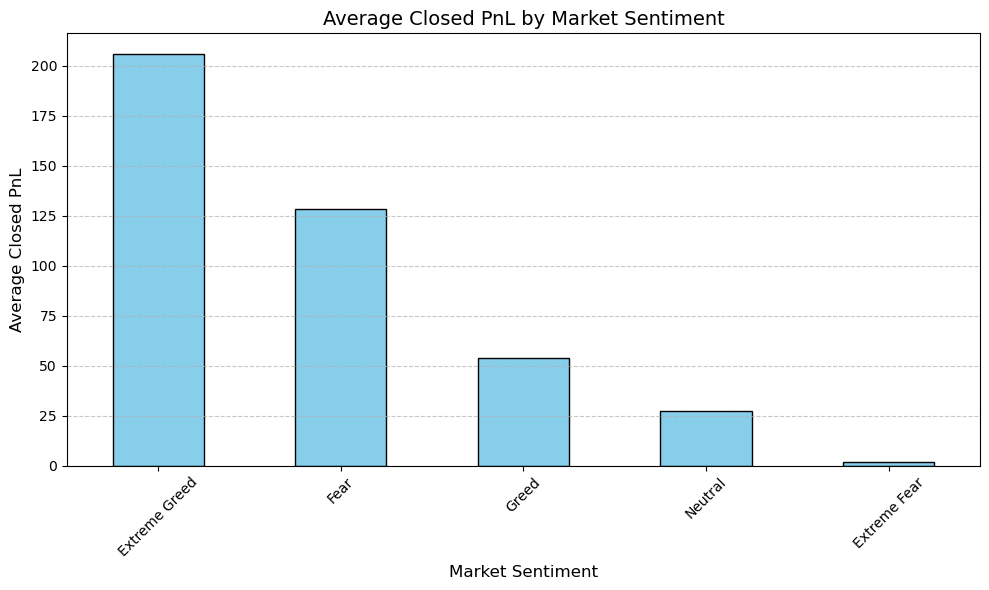

In [13]:
import matplotlib.pyplot as plt

average_pnl_by_sentiments.plot(kind='bar',figsize=(10, 6), color='skyblue', edgecolor='black')

plt.title("Average Closed PnL by Market Sentiment", fontsize=14)
plt.xlabel("Market Sentiment", fontsize=12)
plt.ylabel("Average Closed PnL", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#

#### Buy vs sell by market sentiment via grouped bar chart

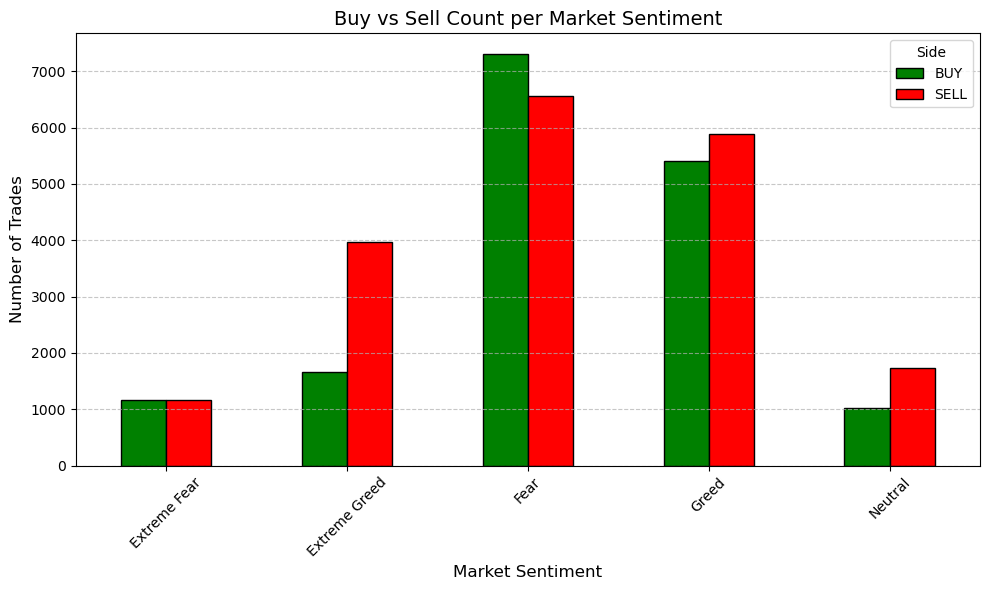

In [14]:
import matplotlib.pyplot as plt

buy_sell_count.plot(kind='bar',figsize=(10, 6),color=["green","red"],edgecolor="black")

plt.title("Buy vs Sell Count per Market Sentiment", fontsize=14)
plt.xlabel("Market Sentiment", fontsize=12)
plt.ylabel("Number of Trades", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Side")
plt.tight_layout()
plt.show()

#

### PnL distribution per market sentiment using boxplot

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8064\3908425299.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x="classification", y="Closed PnL", palette="Set2")


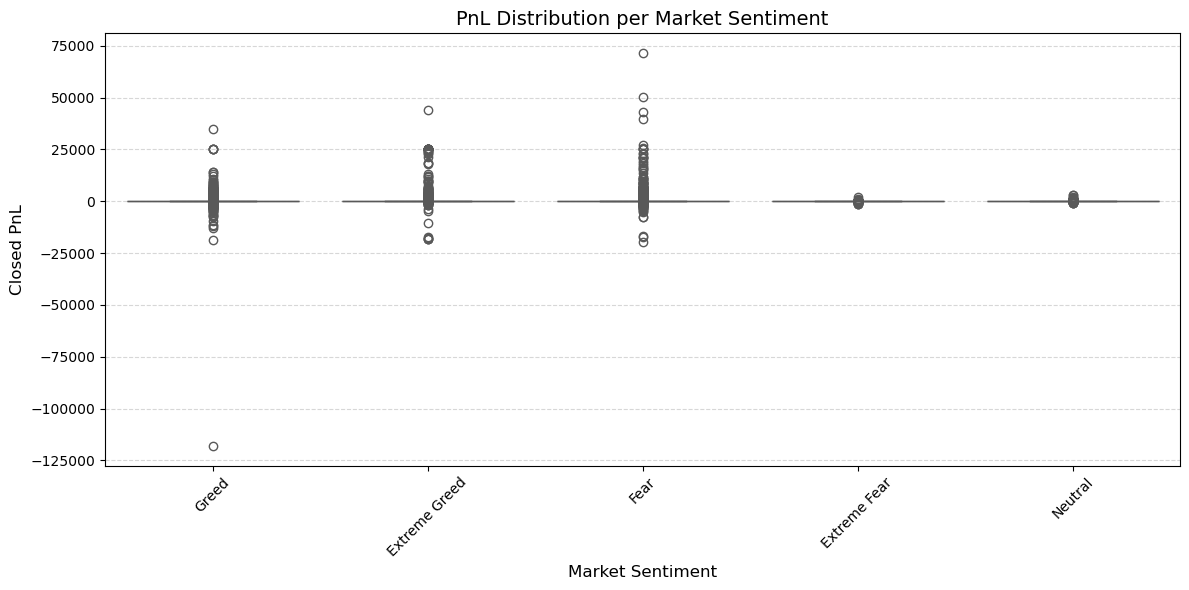

In [21]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x="classification", y="Closed PnL", palette="Set2")
plt.title("PnL Distribution per Market Sentiment", fontsize=14)
plt.xlabel("Market Sentiment", fontsize=12)
plt.ylabel("Closed PnL", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#

### Winrate per market sentiment

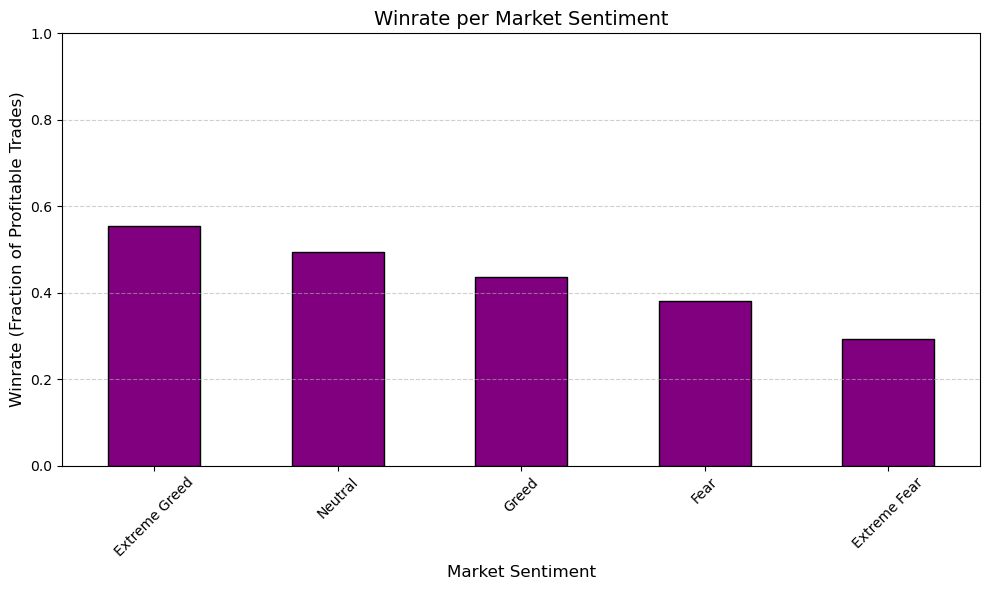

In [16]:
sentiment_winrate = merged_df.groupby("classification")["Closed PnL"].apply(lambda x: (x > 0).mean())

plt.figure(figsize=(10, 6))
sentiment_winrate.sort_values(ascending=False).plot(kind='bar', color='purple', edgecolor='black')

plt.title("Winrate per Market Sentiment", fontsize=14)
plt.xlabel("Market Sentiment", fontsize=12)
plt.ylabel("Winrate (Fraction of Profitable Trades)", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
